In [646]:
import matplotlib.pyplot as plt


def print_matrix(matrix):
    if len(matrix.shape) == 2:
        for i in range(matrix.shape[0]):
            row = ''
            for j in range(matrix.shape[1]):
                kek = matrix[i][j]
                if kek > 0:
                    row += str((round(kek, 5))) + ' & '
                else:
                    row += str((round(kek, 4))) + ' & '
            row = row[:-2]
            row += '\\\\'
            print(row)
    elif len(matrix.shape) == 1:
        row = ''
        for i in range(matrix.shape[0]):
            kek = matrix[i]
            if kek > 0:
                row += str((round(kek, 5))) + ' \\\\ '
            else:
                row += str((round(kek, 4))) + ' \\\\ '
        print(row)

In [647]:
import numpy as np
def F(t):
    return 2*np.sin(np.pi*t/2)*np.sqrt(2*(58-51) + t**2*np.sqrt(23-1))
# def F(t):
#     return 3*np.sin(np.pi*t)*np.sqrt(14 + t*np.sqrt(29))

In [648]:
# A = np.linspace(0, 1, 41)
A = np.linspace(0, 2, 11)
print_matrix(A)

0.0 \\ 0.2 \\ 0.4 \\ 0.6 \\ 0.8 \\ 1.0 \\ 1.2 \\ 1.4 \\ 1.6 \\ 1.8 \\ 2.0 \\ 


In [649]:
y = np.array([F(val) for val in A])
print_matrix(y)

0.0 \\ 2.32791 \\ 4.51494 \\ 6.40883 \\ 7.84304 \\ 8.64648 \\ 8.66541 \\ 7.79234 \\ 5.99512 \\ 3.3395 \\ 0.0 \\ 


In [650]:
a_i = y[:-1]
print_matrix(a_i)

0.0 \\ 2.32791 \\ 4.51494 \\ 6.40883 \\ 7.84304 \\ 8.64648 \\ 8.66541 \\ 7.79234 \\ 5.99512 \\ 3.3395 \\ 


In [651]:
h_i = A[1:] - A[:-1]
print(h_i)
g_i = (y[1:-1] - y[:-2])/h_i[0]
print_matrix(g_i)

[0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
11.63957 \\ 10.9351 \\ 9.46949 \\ 7.17105 \\ 4.0172 \\ 0.09466 \\ -4.3653 \\ -8.9861 \\ -13.2781 \\ 


In [652]:
c_matr = np.zeros((len(A)-3, len(A)-3))
for i in range(len(A)-3):
    c_matr[i][i] = 2*(h_i[i] + h_i[i+1])
    if i != len(A)-4:
        c_matr[i][i+1] = h_i[i+1]
        c_matr[i+1][i] = h_i[i+1]
print_matrix(c_matr)

0.8 & 0.2 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
0.2 & 0.8 & 0.2 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
0.0 & 0.2 & 0.8 & 0.2 & 0.0 & 0.0 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.2 & 0.8 & 0.2 & 0.0 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.0 & 0.2 & 0.8 & 0.2 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.0 & 0.0 & 0.2 & 0.8 & 0.2 & 0.0 \\
0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.2 & 0.8 & 0.2 \\
0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.2 & 0.8 \\


In [653]:
right_matr = 3*(g_i[1:] - g_i[:-1])
print_matrix(right_matr)
print()
c_matr_inv = np.linalg.inv(c_matr)
c_i = np.dot(c_matr_inv, right_matr)
c_i = np.insert(c_i, 0, 0)
c_i = np.append(c_i, 0)
print_matrix(c_i)

-2.1134 \\ -4.3968 \\ -6.8953 \\ -9.4615 \\ -11.7676 \\ -13.38 \\ -13.8624 \\ -12.8759 \\ 

0.0 \\ -1.7342 \\ -3.6302 \\ -5.729 \\ -7.9303 \\ -9.8574 \\ -11.4781 \\ -11.1304 \\ -13.3123 \\ 0.0 \\ 


In [654]:
b_i = g_i - h_i[:-1]/3 * (2*c_i[:-1] + c_i[1:])
b_i = np.append(b_i, b_i[-1] + h_i[-2]/3 * (c_i[-2] + c_i[-1]))
print_matrix(b_i)

11.75519 \\ 11.40835 \\ 10.33546 \\ 8.46361 \\ 5.73173 \\ 2.17418 \\ -2.0929 \\ -6.6146 \\ -11.5031 \\ -12.3906 \\ 


In [655]:
d_i = (c_i[1:] - c_i[:-1])/(3*h_i[:-1])
d_i = np.append(d_i, 1/(h_i[-1]**3) * (y[-1] - a_i[-1] - h_i[-1]*b_i[-1] - h_i[-1]**2*c_i[-1]))
print_matrix(d_i)

-2.8903 \\ -3.16 \\ -3.498 \\ -3.6688 \\ -3.2119 \\ -2.7011 \\ 0.57953 \\ -3.6366 \\ 22.18715 \\ -107.6718 \\ 


[0.0, 1.1726284309509392, 2.327914803736779, 3.4482473661878066, 4.514935590115846, 5.508681266270258, 6.4088342371689935, 7.194235594439307, 7.843043374377097, 8.33370177512765, 8.646482697565164, 8.762625766237788, 8.665413797660673, 8.34192100448289, 7.792343991922258, 7.015943863944911, 5.9951173269414415, 4.733868703578231, 3.3394971792003205, 1.9927639269047093, 1.3322676295501878e-15]
[0.0, 1.1726077133815458, 2.327914803736779, 3.448193073864191, 4.514935590115846, 5.508648462183054, 6.408834237168993, 7.194192975959549, 7.843043374377098, 8.333944669401772, 8.646482697565162, 8.762171348388469, 8.665413797660674, 8.34446569318303, 7.792343991922258, 7.007629479303642, 5.9951173269414415, 4.766277724754137, 3.3394971792003196, 1.7400801470371952, 1.4019218899703672e-15]


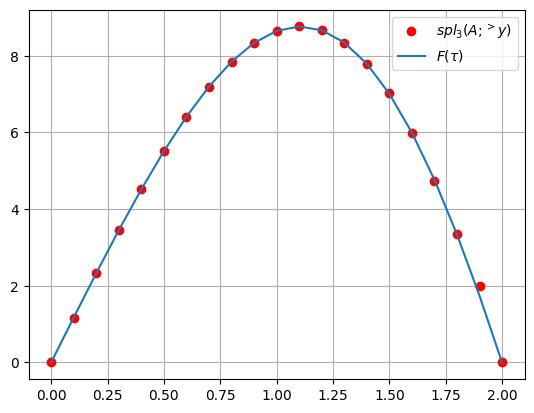

In [656]:
def splain(A, t):
    for i in range(len(A)-1):
        if A[i] <= t <= A[i+1]:
            return a_i[i] + b_i[i]*(t - A[i]) + c_i[i]*(t - A[i])**2 + d_i[i]*(t - A[i])**3
sp_vec = []
for x in A:
    sp_vec.append(splain(A, x))


graph_x = np.linspace(0, 2, 21)
print([splain(A, x) for x in graph_x])
print([F(x) for x in graph_x])
plt.plot(graph_x, [splain(A, x) for x in graph_x], 'ro', label='$spl_3(A; {}^{>} y)$')
plt.plot(graph_x, F(graph_x), label='$F(\\tau)$')
plt.legend()
plt.grid()
plt.savefig('1.png')
plt.show()

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2. ]


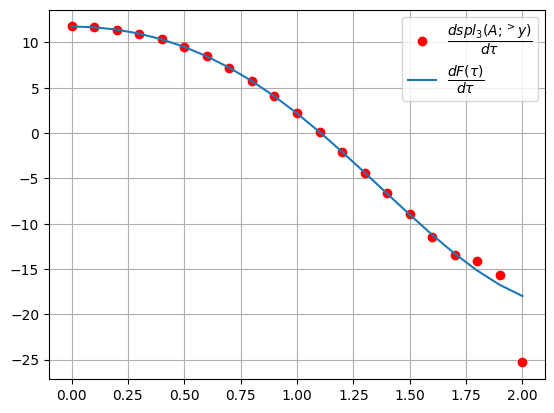

In [657]:
def splain_derivative(A, t):
    for i in range(len(A)-1):
        if A[i] <= t <= A[i+1]:
            return b_i[i] + 2*c_i[i]*(t - A[i]) + 3*d_i[i]*(t - A[i])**2

def F_derivative(t):
    return (np.pi*(np.sqrt(22)*t**2 + 14)*np.cos(np.pi*t/2) + 2*np.sqrt(22)*t*np.sin(np.pi*t/2))/np.sqrt(np.sqrt(22)*t**2 + 14)


graph_x = np.linspace(0, 2, 21)
print(graph_x)
plt.plot(graph_x, [splain_derivative(A, x) for x in graph_x], 'ro', label='$ \dfrac {d spl_3(A; {}^{>} y)} {d \\tau}$')
plt.plot(graph_x, F_derivative(graph_x), label='$\dfrac {d F(\\tau)} {d \\tau}$')
plt.legend()
plt.grid()
plt.savefig('2.png')
plt.show()